Load the clean dataset for 2012

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, ensemble, metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.externals import joblib
1
from sklearn.preprocessing import Imputer, MinMaxScaler
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df_2012 = pd.read_csv('Data/brfss_2012_clean.csv')#Make sure to delete the stupid comma at the beggining of the .csv file


In [3]:
df_2012.head(n=40)

,fallinj2,recordid,fall12mn,x.state,numadult,nummen,numwomen,genhlth,physhlth,menthlth,persdoc2,medcost,checkup1,exerany2,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd1,havarth3,addepev2,chckidny,chcvisn1,diabete3,age,hispanc2,children,educa,employ,weight2,height3,cpdemo1,sex,useequip,smokday2,alcday5
0,NaN,2,0.0,1,4.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,6.0,1.0,175.0,66.0,1.0,1,0.0,0.0,3.000000
1,NaN,6,0.0,1,2.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,4.0,1.0,250.0,73.0,1.0,1,0.0,0.0,4.285714
2,0.0,8,1.0,1,2.0,1.0,1.0,3.0,21.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,6.0,1.0,210.0,69.0,1.0,1,1.0,0.0,25.000000
3,0.0,9,1.0,1,1.0,1.0,0.0,2.0,14.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,55.0,0.0,0.0,6.0,1.0,175.0,66.0,0.0,1,0.0,1.0,0.000000
4,NaN,16,0.0,1,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,5.0,5.0,114.0,62.0,1.0,0,0.0,0.0,0.000000
5,NaN,29,0.0,1,4.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,1.0,5.0,1.0,163.0,67.0,0.0,0,0.0,0.0,0.000000
6,0.0,34,5.0,1,5.0,3.0,2.0,4.0,14.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,61.0,0.0,1.0,3.0,1.0,198.0,63.0,1.0,0,0.0,0.0,0.000000
7,NaN,37,0.0,1,2.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,4.0,1.0,182.0,68.0,1.0,0,0.0,0.0,0.000000
8,0.0,42,2.0,1,1.0,0.0,1.0,3.0,3.0,30.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,53.0,0.0,1.0,5.0,1.0,200.0,68.0,1.0,0,0.0,1.0,0.000000
9,0.0,43,1.0,1,2.0,1.0,1.0,1.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,53.0,0.0,2.0,6.0,1.0,215.0,66.0,1.0,0,0.0,0.0,0.000000


In [4]:
sum(df_2012['fall12mn'].tolist())

62088.0

In [5]:
print df_2012.shape
nullmask = pd.isnull(df_2012)
print np.sum(nullmask)   #Checking that there are no NaNs (except in injuries, but that's not a feature)

(114109, 38)
fallinj2    86785
recordid        0
fall12mn        0
x.state         0
numadult        0
nummen          0
numwomen        0
genhlth         0
physhlth        0
menthlth        0
persdoc2        0
medcost         0
checkup1        0
exerany2        0
cvdinfr4        0
cvdcrhd4        0
cvdstrk3        0
asthma3         0
chcscncr        0
chcocncr        0
chccopd1        0
havarth3        0
addepev2        0
chckidny        0
chcvisn1        0
diabete3        0
age             0
hispanc2        0
children        0
educa           0
employ          0
weight2         0
height3         0
cpdemo1         0
sex             0
useequip        0
smokday2        0
alcday5         0
dtype: int64


create X and y

In [6]:
y = df_2012['fall12mn']

In [7]:
y = pd.Series(y,name='fall12mn')

In [8]:
y

0         0.0
1         0.0
2         1.0
3         1.0
4         0.0
5         0.0
6         5.0
7         0.0
8         2.0
9         1.0
10        0.0
11        2.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        1.0
22        0.0
23        0.0
24        1.0
25        0.0
26        0.0
27        1.0
28        0.0
29        0.0
         ... 
114079    0.0
114080    0.0
114081    0.0
114082    0.0
114083    0.0
114084    1.0
114085    0.0
114086    3.0
114087    3.0
114088    0.0
114089    4.0
114090    0.0
114091    0.0
114092    0.0
114093    0.0
114094    0.0
114095    0.0
114096    0.0
114097    1.0
114098    0.0
114099    0.0
114100    0.0
114101    0.0
114102    0.0
114103    0.0
114104    1.0
114105    0.0
114106    0.0
114107    0.0
114108    0.0
Name: fall12mn, dtype: float64

Now segregate out X by making a list of the column indices you want to keep

In [9]:
indices = [name for name in df_2012.columns if name != 'fallinj2']#Take out injuries because we don't train on them
indices2 = [name for name in indices if name != 'recordid']#Take out record label...it's an arbitrary label
indices3 = [name for name in indices2 if name != 'fall12mn']#Take out fall's, it's the y variable, not a feature
indices4 = [name for name in indices3 if name != 'x.state']#state is probably causing overfitting, remove

In [10]:
indices4

['numadult',
 'nummen',
 'numwomen',
 'genhlth',
 'physhlth',
 'menthlth',
 'persdoc2',
 'medcost',
 'checkup1',
 'exerany2',
 'cvdinfr4',
 'cvdcrhd4',
 'cvdstrk3',
 'asthma3',
 'chcscncr',
 'chcocncr',
 'chccopd1',
 'havarth3',
 'addepev2',
 'chckidny',
 'chcvisn1',
 'diabete3',
 'age',
 'hispanc2',
 'children',
 'educa',
 'employ',
 'weight2',
 'height3',
 'cpdemo1',
 'sex',
 'useequip',
 'smokday2',
 'alcday5']

In [11]:
X = df_2012[indices4]

In [12]:
X.columns

Index([u'numadult', u'nummen', u'numwomen', u'genhlth', u'physhlth',
       u'menthlth', u'persdoc2', u'medcost', u'checkup1', u'exerany2',
       u'cvdinfr4', u'cvdcrhd4', u'cvdstrk3', u'asthma3', u'chcscncr',
       u'chcocncr', u'chccopd1', u'havarth3', u'addepev2', u'chckidny',
       u'chcvisn1', u'diabete3', u'age', u'hispanc2', u'children', u'educa',
       u'employ', u'weight2', u'height3', u'cpdemo1', u'sex', u'useequip',
       u'smokday2', u'alcday5'],
      dtype='object')

In [13]:
features_keep = ['age', 'weight2', 'height3', 'alcday5']

In [14]:
X_cutfeatures = X[features_keep]

In [15]:
X_cutfeatures.columns

Index([u'age', u'weight2', u'height3', u'alcday5'], dtype='object')

In [16]:
X.index

RangeIndex(start=0, stop=114109, step=1)

Do feature scaling

In [17]:
scaler = MinMaxScaler()

In [18]:
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns, index = X.index)

In [19]:
X_scaled

,numadult,nummen,numwomen,genhlth,physhlth,menthlth,persdoc2,medcost,checkup1,exerany2,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd1,havarth3,addepev2,chckidny,chcvisn1,diabete3,age,hispanc2,children,educa,employ,weight2,height3,cpdemo1,sex,useequip,smokday2,alcday5
0,0.250000,0.111111,0.333333,0.00,0.000000,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.36,0.0,0.000000,1.0,0.00,0.227273,0.173261,1.0,1.0,0.0,0.0,0.100000
1,0.083333,0.111111,0.111111,0.50,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.00,0.32,0.0,0.000000,0.6,0.00,0.363636,0.216576,1.0,1.0,0.0,0.0,0.142857
2,0.083333,0.111111,0.111111,0.50,0.700000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.00,0.32,0.0,0.000000,1.0,0.00,0.290909,0.191824,1.0,1.0,1.0,0.0,0.833333
3,0.000000,0.111111,0.000000,0.25,0.466667,0.000000,1.0,0.0,0.285714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.00,0.40,0.0,0.000000,1.0,0.00,0.227273,0.173261,0.0,1.0,0.0,1.0,0.000000
4,0.083333,0.111111,0.111111,0.25,0.000000,0.000000,1.0,0.0,0.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.84,0.0,0.000000,0.8,1.00,0.116364,0.148509,1.0,0.0,0.0,0.0,0.000000
5,0.250000,0.222222,0.222222,0.00,0.000000,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.08,0.0,0.090909,0.8,0.00,0.205455,0.179448,0.0,0.0,0.0,0.0,0.000000
6,0.333333,0.333333,0.222222,0.75,0.466667,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.25,0.64,0.0,0.090909,0.4,0.00,0.269091,0.154697,1.0,0.0,0.0,0.0,0.000000
7,0.083333,0.111111,0.111111,0.50,0.000000,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.36,0.0,0.000000,0.6,0.00,0.240000,0.185636,1.0,0.0,0.0,0.0,0.000000
8,0.000000,0.000000,0.111111,0.50,0.100000,1.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.25,0.32,0.0,0.090909,0.8,0.00,0.272727,0.185636,1.0,0.0,0.0,1.0,0.000000
9,0.083333,0.111111,0.111111,0.00,0.166667,0.033333,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.25,0.32,0.0,0.181818,1.0,0.00,0.300000,0.173261,1.0,0.0,0.0,0.0,0.000000


Before training any models, need to convert categoricals to one hot encoding

In [20]:
categoricals = ['genhlth','checkup1','diabete3','educa','employ','smokday2']
#categoricals = ['genhlth']

In [21]:
X_scaled = pd.get_dummies(X_scaled,columns = categoricals)

In [22]:
X_scaled.head()

,numadult,nummen,numwomen,physhlth,menthlth,persdoc2,medcost,exerany2,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd1,havarth3,addepev2,chckidny,chcvisn1,age,hispanc2,children,weight2,height3,cpdemo1,sex,useequip,alcday5,genhlth_0.0,genhlth_0.25,genhlth_0.5,genhlth_0.75,genhlth_1.0,checkup1_0.0,checkup1_0.142857142857,checkup1_0.285714285714,checkup1_0.428571428571,checkup1_1.0,diabete3_0.0,diabete3_0.25,diabete3_1.0,educa_0.0,educa_0.2,educa_0.4,educa_0.6,educa_0.8,educa_1.0,employ_0.0,employ_0.25,employ_0.5,employ_0.75,employ_1.0,smokday2_0.0,smokday2_0.5,smokday2_1.0
0,0.250000,0.111111,0.333333,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.36,0.0,0.0,0.227273,0.173261,1.0,1.0,0.0,0.100000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,0.083333,0.111111,0.111111,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.32,0.0,0.0,0.363636,0.216576,1.0,1.0,0.0,0.142857,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0.083333,0.111111,0.111111,0.700000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.32,0.0,0.0,0.290909,0.191824,1.0,1.0,1.0,0.833333,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
3,0.000000,0.111111,0.000000,0.466667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.40,0.0,0.0,0.227273,0.173261,0.0,1.0,0.0,0.000000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
4,0.083333,0.111111,0.111111,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.84,0.0,0.0,0.116364,0.148509,1.0,0.0,0.0,0.000000,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [23]:
X_scaled.columns

Index([u'numadult', u'nummen', u'numwomen', u'physhlth', u'menthlth',
       u'persdoc2', u'medcost', u'exerany2', u'cvdinfr4', u'cvdcrhd4',
       u'cvdstrk3', u'asthma3', u'chcscncr', u'chcocncr', u'chccopd1',
       u'havarth3', u'addepev2', u'chckidny', u'chcvisn1', u'age', u'hispanc2',
       u'children', u'weight2', u'height3', u'cpdemo1', u'sex', u'useequip',
       u'alcday5', u'genhlth_0.0', u'genhlth_0.25', u'genhlth_0.5',
       u'genhlth_0.75', u'genhlth_1.0', u'checkup1_0.0',
       u'checkup1_0.142857142857', u'checkup1_0.285714285714',
       u'checkup1_0.428571428571', u'checkup1_1.0', u'diabete3_0.0',
       u'diabete3_0.25', u'diabete3_1.0', u'educa_0.0', u'educa_0.2',
       u'educa_0.4', u'educa_0.6', u'educa_0.8', u'educa_1.0', u'employ_0.0',
       u'employ_0.25', u'employ_0.5', u'employ_0.75', u'employ_1.0',
       u'smokday2_0.0', u'smokday2_0.5', u'smokday2_1.0'],
      dtype='object')

Split X and y into cv and test sets

In [24]:
X.index

RangeIndex(start=0, stop=114109, step=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 0)

In [26]:
X_train.to_csv('Data/for_Jerry/X_train.csv',index=False)
X_test.to_csv('Data/for_Jerry/X_test.csv',index=False)
y_train.to_csv('Data/for_Jerry/y_train.csv',index=False)
y_test.to_csv('Data/for_Jerry/y_test.csv',index=False)

In [27]:
X_train.shape

(91287, 55)

In [28]:
type(X_train)

pandas.core.frame.DataFrame

In [29]:
X_test.index

Int64Index([ 43503,  18733,  35160,  55441,   9745, 106825,  45736,  86051,
             14153,  78712,
            ...
              5039, 103018,  80006, 103728,  52591,  91368,  73743,  63829,
              7405,  91686],
           dtype='int64', length=22822)

In [30]:
y_test.index

Int64Index([ 43503,  18733,  35160,  55441,   9745, 106825,  45736,  86051,
             14153,  78712,
            ...
              5039, 103018,  80006, 103728,  52591,  91368,  73743,  63829,
              7405,  91686],
           dtype='int64', length=22822)

In [31]:
X_test.shape

(22822, 55)

In [32]:
X_scaled.shape

(114109, 55)

In [33]:
y_train.shape

(91287,)

In [34]:
y_test.shape

(22822,)

In [35]:
y.shape

(114109,)

In [36]:
lr = linear_model.LinearRegression(fit_intercept = True) #define the model
lr.fit(X_train, y_train) #train the model
print(lr.coef_) #These are the trained coefficients
print(lr.score(X_train,y_train)) #This is the R^2 of the fit
pred_train = lr.predict(X_train) #these are the fit y values
pred_test = lr.predict(X_test) #these are the predictions based on the test data

[  4.92997892e+00  -3.95794028e+00  -3.68300023e+00   4.68328822e-01
   2.40202345e-01  -5.62849226e-02   9.29698942e-02   4.53948774e-02
  -1.95402094e-02   1.28611407e-01   3.63772104e-01   1.26193719e-01
   9.23741766e-02  -1.75802596e-02  -4.65796976e-02   1.94648546e-01
   2.63101876e-01   2.46265375e-01   5.87930697e-01  -1.68444120e-01
  -1.54972954e-01   1.01155551e-01  -1.38505542e-01   1.95164596e-01
   4.39480983e-02   1.09704635e-01   9.18210379e-01   1.39807011e-01
   5.85365902e+12   5.85365902e+12   5.85365902e+12   5.85365902e+12
   5.85365902e+12   9.71730650e+11   9.71730650e+11   9.71730650e+11
   9.71730650e+11   9.71730650e+11  -2.99994610e+12  -2.99994610e+12
  -2.99994610e+12  -9.33740792e+11  -9.33740792e+11  -9.33740792e+11
  -9.33740792e+11  -9.33740792e+11  -9.33740792e+11   4.76662746e+10
   4.76662746e+10   4.76662746e+10   4.76662746e+10   4.76662746e+10
  -2.17183645e+11  -2.17183645e+11  -2.17183645e+11]
0.0422029916084


In [37]:
lr.coef_.shape

(55,)

In [38]:
type(pred_train)

numpy.ndarray

In [39]:
pred_train.shape

(91287,)

In [40]:
pred_train

array([ 0.25341797,  0.16064453,  0.26025391, ..., -0.01269531,
        0.2265625 ,  0.32568359])

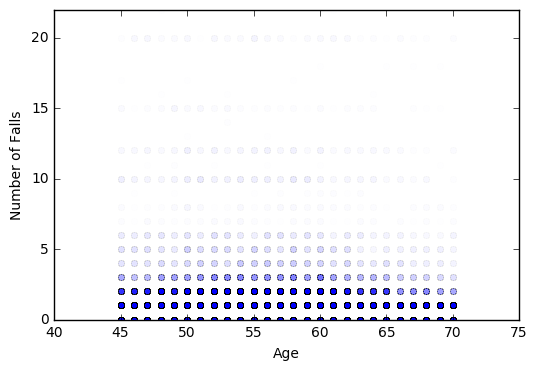

In [41]:
xval =np.array(df_2012['age'].tolist())
yval =np.array(df_2012['fall12mn'].tolist())
plt.scatter(xval,yval,alpha=0.002)
plt.xlim(40,75)
plt.ylim(0,22)
plt.xlabel('Age')
plt.ylabel('Number of Falls')

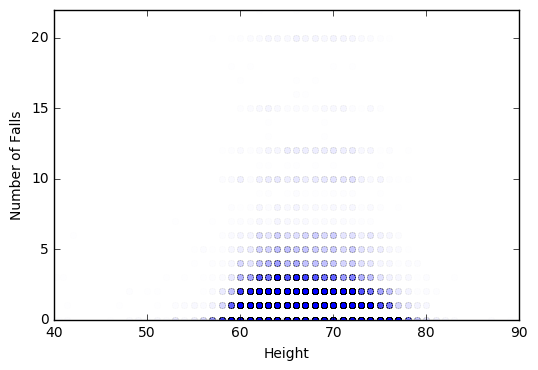

In [42]:
xval =np.array(df_2012['height3'].tolist())
yval =np.array(df_2012['fall12mn'].tolist())
plt.scatter(xval,yval,alpha=0.002)
plt.xlim(40,90)
plt.ylim(0,22)
plt.xlabel('Height')
plt.ylabel('Number of Falls')

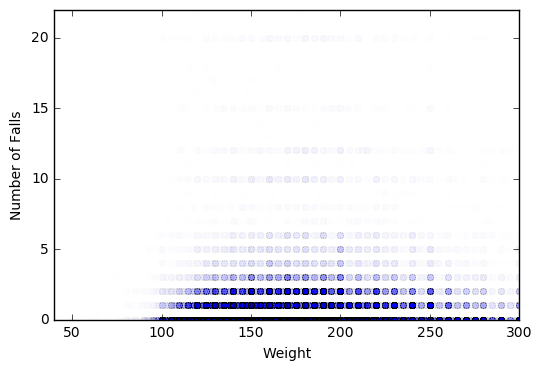

In [43]:
xval =np.array(df_2012['weight2'].tolist())
yval =np.array(df_2012['fall12mn'].tolist())
plt.scatter(xval,yval,alpha=0.002)
plt.xlim(40,300)
plt.ylim(0,22)
plt.xlabel('Weight')
plt.ylabel('Number of Falls')

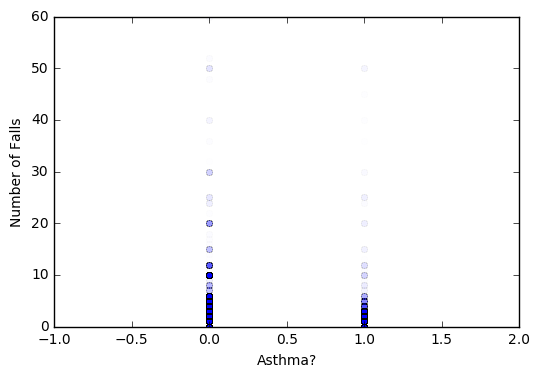

In [44]:
xval =np.array(df_2012['asthma3'].tolist())
yval =np.array(df_2012['fall12mn'].tolist())
plt.scatter(xval,yval,alpha=0.002)
plt.xlim(-1,2)
plt.ylim(0,60)
plt.xlabel('Asthma?')
plt.ylabel('Number of Falls')

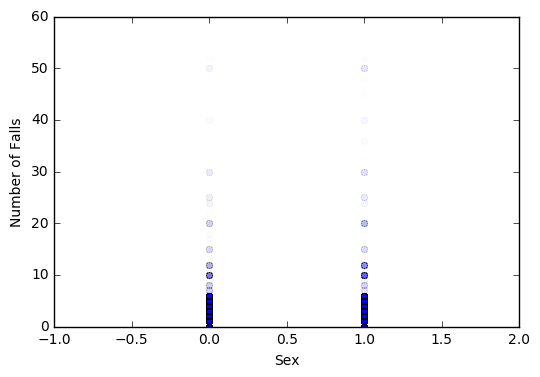

In [45]:
xval =np.array(df_2012['sex'].tolist())
yval =np.array(df_2012['fall12mn'].tolist())
plt.scatter(xval,yval,alpha=0.002)
plt.xlim(-1,2)
plt.ylim(0,60)
plt.xlabel('Sex')
plt.ylabel('Number of Falls')

In [46]:
#falls experienced by men
totalmenfalls = 0
for falls, nummen in zip (y.loc[X['sex']==1].value_counts(dropna=False).index, y.loc[X['sex']==1].value_counts(dropna=False).values):
    totalmenfalls += float(falls)*nummen
print totalmenfalls

26713.0


In [47]:
#falls experienced by women
totalwomenfalls = 0
for falls, numwomen in zip (y.loc[X['sex']==0].value_counts(dropna=False).index, y.loc[X['sex']==0].value_counts(dropna=False).values):
    totalwomenfalls += float(falls)*numwomen
print totalwomenfalls

35375.0


In [48]:
fallswomen = y.loc[X['sex']==0].value_counts(dropna=False).index
numwomen = y.loc[X['sex']==0].value_counts(dropna=False).values
fallsmen = y.loc[X['sex']==1].value_counts(dropna=False).index
nummen = y.loc[X['sex']==1].value_counts(dropna=False).values

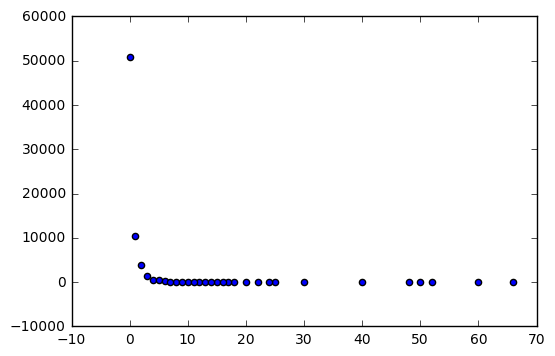

In [49]:
plt.scatter(fallswomen,numwomen) #number of falls vs. number of women experiencing that number of falls

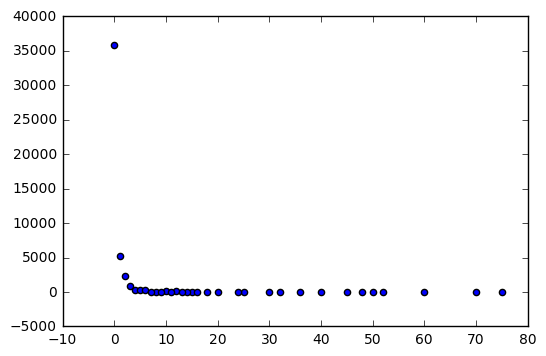

In [50]:
plt.scatter(fallsmen,nummen) #number of falls vs. number of men experiencing that number of falls

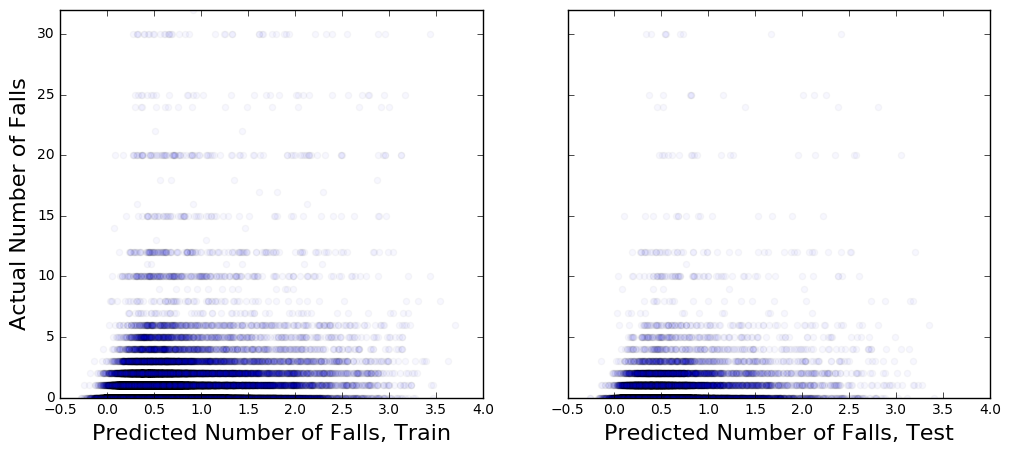

In [51]:

fig, [axL, axR] = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True);
axL.scatter(pred_train, y_train, alpha = .03);
axL.set_xlabel('Predicted Number of Falls, Train');
axL.xaxis.label.set_fontsize(16);
#axL.set_xlim(0,22);
axL.set_ylabel('Actual Number of Falls');
axL.yaxis.label.set_fontsize(16);
axL.set_ylim(0,32);

axR.scatter(pred_test, y_test, alpha = .03);
axR.set_xlabel('Predicted Number of Falls, Test');
axR.xaxis.label.set_fontsize(16);
#axR.set_xlim(0,22);

Try to find prediction accuracy

In [52]:
y_train_array = np.array(y_train)
y_train_array.astype(int)

array([0, 0, 0, ..., 0, 1, 0])

In [53]:
pred_train_integers = np.rint(pred_train)

In [54]:
pred_train_integers.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
pred_train #check that rint() didn't operate in-place

array([ 0.25341797,  0.16064453,  0.26025391, ..., -0.01269531,
        0.2265625 ,  0.32568359])

In [56]:
thingIneed = np.logical_not(np.logical_xor(pred_train_integers.astype(int),y_train_array.astype(int)))

In [57]:
thingIneed

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

In [58]:
numtrues = np.sum(thingIneed)

In [59]:
numtrues

55790

In [60]:
numfalses = np.size(thingIneed) - numtrues

In [61]:
numfalses

35497

In [62]:
training_accuracy = float(numtrues)/(numtrues+numfalses)

In [63]:
training_accuracy

0.6111494517291619

In [64]:
X_test

,numadult,nummen,numwomen,physhlth,menthlth,persdoc2,medcost,exerany2,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,chcscncr,chcocncr,chccopd1,havarth3,addepev2,chckidny,chcvisn1,age,hispanc2,children,weight2,height3,cpdemo1,sex,useequip,alcday5,genhlth_0.0,genhlth_0.25,genhlth_0.5,genhlth_0.75,genhlth_1.0,checkup1_0.0,checkup1_0.142857142857,checkup1_0.285714285714,checkup1_0.428571428571,checkup1_1.0,diabete3_0.0,diabete3_0.25,diabete3_1.0,educa_0.0,educa_0.2,educa_0.4,educa_0.6,educa_0.8,educa_1.0,employ_0.0,employ_0.25,employ_0.5,employ_0.75,employ_1.0,smokday2_0.0,smokday2_0.5,smokday2_1.0
43503,0.083333,0.222222,0.000000,1.000000,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.48,1.0,0.000000,0.454545,0.185636,0.0,1.0,0.0,1.000000,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
18733,0.083333,0.111111,0.111111,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.190909,0.160885,1.0,0.0,0.0,0.000000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
35160,0.083333,0.111111,0.111111,0.033333,0.033333,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.48,0.0,0.000000,0.181818,0.173261,1.0,0.0,0.0,0.285714,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
55441,0.166667,0.222222,0.111111,0.233333,0.066667,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.12,0.0,0.181818,0.236364,0.179448,1.0,0.0,1.0,0.000000,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
9745,0.083333,0.111111,0.111111,0.333333,0.166667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.72,0.0,0.000000,0.247273,0.222764,1.0,1.0,0.0,0.066667,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
106825,0.333333,0.333333,0.222222,0.066667,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.04,0.0,0.090909,0.218182,0.173261,1.0,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
45736,0.166667,0.222222,0.111111,0.033333,0.166667,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.16,0.0,1.000000,0.334545,0.191824,1.0,1.0,0.0,0.000000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
86051,0.000000,0.000000,0.111111,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.0,0.000000,0.181818,0.148509,1.0,0.0,0.0,0.000000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
14153,0.166667,0.222222,0.111111,0.033333,0.033333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.236364,0.185636,1.0,1.0,0.0,0.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
78712,0.083333,0.000000,0.222222,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.64,0.0,0.000000,0.254545,0.173261,1.0,0.0,0.0,0.000000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0


In [65]:
y_test, X_test

(43503     2.0
 18733     1.0
 35160     0.0
 55441     1.0
 9745      0.0
 106825    1.0
 45736     0.0
 86051     0.0
 14153     3.0
 78712     0.0
 75778     0.0
 37088     0.0
 69642     2.0
 6469      0.0
 27992     0.0
 48658     0.0
 70953     0.0
 105564    0.0
 48027     1.0
 74958     0.0
 68951     0.0
 64544     1.0
 29229     0.0
 63116     1.0
 26911     0.0
 87242     0.0
 47175     0.0
 46760     0.0
 19164     0.0
 63218     0.0
          ... 
 100454    0.0
 83121     0.0
 23154     0.0
 31048     0.0
 39017     0.0
 82493     2.0
 101284    0.0
 55152     0.0
 35597     8.0
 1326      0.0
 73299     0.0
 30577     6.0
 107084    5.0
 49130     1.0
 63556     0.0
 19720     0.0
 43591     0.0
 70379     0.0
 92335     2.0
 30510     0.0
 5039      2.0
 103018    0.0
 80006     0.0
 103728    0.0
 52591     2.0
 91368     0.0
 73743     0.0
 63829     0.0
 7405      1.0
 91686     0.0
 Name: fall12mn, dtype: float64,
         numadult    nummen  numwomen  physhlth  men

Create a pickle file of your model

In [66]:
joblib.dump(lr,'lr_model.pkl')

['lr_model.pkl']

In [67]:
type(pred_test)

numpy.ndarray

In [68]:
pred_test.sum()

12490.9921875

In [69]:
pred_test

array([ 1.62744141,  0.25927734,  0.34082031, ...,  0.52929688,
        0.51611328,  0.53613281])

In [72]:
rfc = ensemble.RandomForestRegressor(n_estimators = 500, n_jobs=-1)

In [596]:
param_distributions = {'max_features': [1,2,3,4], 'min_samples_leaf': [2,5,10,20,30], 'max_depth': [1,2,3,4,5]}

In [597]:
n_iter = 70 #Ryan uses 100

In [598]:
cv=KFold(n_splits=5)

In [599]:
cv_search = RandomizedSearchCV(estimator=rfc,param_distributions=param_distributions,n_iter=n_iter,cv=cv, random_state = 0, n_jobs = -1, verbose = True)

In [600]:
cv_search.fit(X_train,y_train)


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  5.4min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
          error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=70, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=70, n_jobs=-1,
          param_distributions={'max_features': [1, 2, 3, 4], 'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [2, 5, 10, 20, 30]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring=None, verbose=True)

In [601]:
cv_search.cv_results_

{'mean_fit_time': array([ 2.24874091,  3.92198052,  1.18620572,  4.10629253,  5.13399754,
         5.06413741,  1.89088373,  4.20766983,  3.37567759,  6.20854297,
         3.58680425,  5.89718838,  5.58049064,  1.91188869,  1.76653013,
         3.18498583,  2.04517732,  2.04096422,  3.118782  ,  1.76984859,
         2.41796379,  2.88633628,  1.4051754 ,  4.81899838,  3.31711264,
         3.35069556,  1.68882012,  6.72860918,  3.32371321,  6.03855352,
         2.59729953,  2.95530677,  5.37772784,  3.68271422,  3.7311512 ,
         2.20814137,  2.13897967,  4.45578046,  2.81709838,  4.43000436,
         1.26725531,  2.63136258,  2.21514759,  2.26175065,  1.24812455,
         2.04343333,  2.11021481,  2.17387342,  3.15348458,  1.59632845,
         5.43173604,  4.33153019,  1.36947742,  2.77076397,  2.38962994,
         3.70261321,  1.78985801,  3.15794582,  1.76394138,  3.61329484,
         1.82381215,  2.78781538,  3.67305856,  4.22047124,  5.48329716,
         4.23977237,  2.7812932 , 

In [603]:
cv_search.grid_scores_

/home/rkamar/anaconda2/envs/my_projects_env/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.00102, std: 0.00037, params: {'max_features': 2, 'max_depth': 2, 'min_samples_leaf': 5},
 mean: 0.00097, std: 0.00062, params: {'max_features': 2, 'max_depth': 5, 'min_samples_leaf': 5},
 mean: 0.00040, std: 0.00011, params: {'max_features': 1, 'max_depth': 1, 'min_samples_leaf': 10},
 mean: 0.00094, std: 0.00054, params: {'max_features': 4, 'max_depth': 3, 'min_samples_leaf': 2},
 mean: 0.00060, std: 0.00068, params: {'max_features': 4, 'max_depth': 4, 'min_samples_leaf': 2},
 mean: 0.00091, std: 0.00067, params: {'max_features': 3, 'max_depth': 5, 'min_samples_leaf': 20},
 mean: 0.00063, std: 0.00050, params: {'max_features': 4, 'max_depth': 1, 'min_samples_leaf': 5},
 mean: 0.00113, std: 0.00059, params: {'max_features': 3, 'max_depth': 4, 'min_samples_leaf': 20},
 mean: 0.00119, std: 0.00059, params: {'max_features': 3, 'max_depth': 3, 'min_samples_leaf': 30},
 mean: -0.00134, std: 0.00176, params: {'max_features': 4, 'max_depth': 5, 'min_samples_leaf': 2},
 mean: 0.00114,

In [604]:
cv_search.best_score_

0.0012513452902231544

In [605]:
for param_name in sorted(param_distributions.keys()):
    print("%s: %r" % (param_name, cv_search.best_params_[param_name]))

max_depth: 4
max_features: 2
min_samples_leaf: 20


In [73]:
rfc = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [74]:
rfc = rfc.fit(X_train,y_train)

In [75]:
joblib.dump(rfc,'rfc_model.pkl')

['rfc_model.pkl']

In [76]:
pred_y_train = rfc.predict(X_train)

In [77]:
y_train

40167     0.0
23604     0.0
45667     0.0
63796     0.0
27887     1.0
34092     0.0
112480    0.0
18965     0.0
82719     0.0
48151     0.0
20279     0.0
102575    0.0
90487     0.0
16069     0.0
5413      2.0
65058     2.0
42424     3.0
101983    0.0
33664     0.0
15893     0.0
84125     0.0
104972    0.0
53810     0.0
81892     1.0
3547      0.0
55112     0.0
24577     0.0
102731    1.0
112913    0.0
13818     0.0
         ... 
70608     0.0
67699     0.0
38804     0.0
6921      0.0
104520    0.0
93005     2.0
82457     0.0
101201    0.0
89688     0.0
108631    4.0
18983     0.0
32230     6.0
17089     0.0
80186     0.0
52620     0.0
39512     0.0
48600     0.0
80966     1.0
80471     1.0
112420    1.0
55026     0.0
86293     0.0
41993     0.0
97639     0.0
95939     0.0
21243     0.0
45891     0.0
42613     0.0
43567     1.0
68268     0.0
Name: fall12mn, dtype: float64

In [78]:
pred_y_train

array([ 0.216,  0.03 ,  0.084, ...,  0.062,  0.726,  0.274])

In [79]:
metrics.mean_squared_error(y_train,pred_y_train)

0.5826068374352118

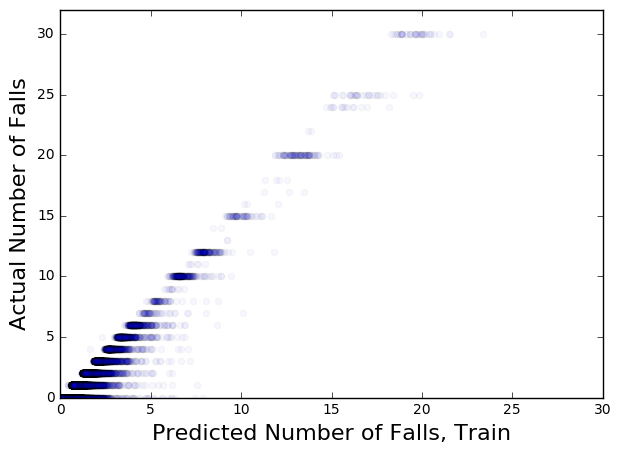

In [80]:
fig, axL = plt.subplots(nrows=1, ncols=1, figsize=(7,5));
axL.scatter(pred_y_train, y_train, alpha = .03);
axL.set_xlabel('Predicted Number of Falls, Train');
axL.xaxis.label.set_fontsize(16);
axL.set_xlim(0,30);
axL.set_ylabel('Actual Number of Falls');
axL.yaxis.label.set_fontsize(16);
axL.set_ylim(0,32);


In [236]:
cv_search.best_params_

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 10}

In [81]:
for col, imp in zip (X_train.columns, rfc.feature_importances_):
    print col, imp

numadult 0.0241081498821
nummen 0.0173884880514
numwomen 0.0223186925576
physhlth 0.0427647363163
menthlth 0.0362498192876
persdoc2 0.0122855736159
medcost 0.00950336841753
exerany2 0.0128511567043
cvdinfr4 0.00578834574513
cvdcrhd4 0.00874975586386
cvdstrk3 0.00666337958054
asthma3 0.0164147793237
chcscncr 0.0137160554049
chcocncr 0.00919665890416
chccopd1 0.00636063120606
havarth3 0.00953189792851
addepev2 0.00833557593425
chckidny 0.00684821378669
chcvisn1 0.0144602172263
age 0.104992068014
hispanc2 0.00425046352314
children 0.0287435279976
weight2 0.134028392848
height3 0.0859015847212
cpdemo1 0.0140847189456
sex 0.00894830209031
useequip 0.0171400434279
alcday5 0.0756298538693
genhlth_0.0 0.019015932304
genhlth_0.25 0.0171895326755
genhlth_0.5 0.0108152738676
genhlth_0.75 0.00862695652606
genhlth_1.0 0.00490592940447
checkup1_0.0 0.00872292624341
checkup1_0.142857142857 0.0128325241512
checkup1_0.285714285714 0.00746787033919
checkup1_0.428571428571 0.0129668850274
checkup1_1.0 0.

In [82]:
type(col)

str

In [83]:
type(imp)

numpy.float64

In [84]:
X_train.to_csv('DataForPresentation.csv', index=False)

In [85]:
pred_y_test = rfc.predict(X_test)

In [86]:
metrics.mean_squared_error(y_test,pred_y_test)

4.2297064252950944

In [87]:
metrics.r2_score(y_test,pred_y_test)

-0.025727194303489131

In [88]:
metrics.r2_score(y_train,pred_y_train)

0.85897661589525098

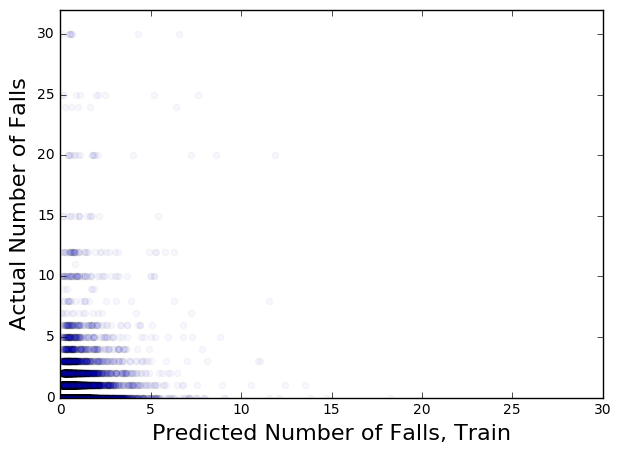

In [89]:
fig, axL = plt.subplots(nrows=1, ncols=1, figsize=(7,5));
axL.scatter(pred_y_test, y_test, alpha = .03);
axL.set_xlabel('Predicted Number of Falls, Train');
axL.xaxis.label.set_fontsize(16);
axL.set_xlim(0,30);
axL.set_ylabel('Actual Number of Falls');
axL.yaxis.label.set_fontsize(16);
axL.set_ylim(0,32);

Ramdom Forest Regression not working, move on to Random Forest Classification